### **INTRODUCTION**

This file present Travel Insurance Prediction Project from Sprint 1 Module 3 at Turing College.

It includes:

* performing EDA of the dataset
* conducting data preprocessing
* practicing SQL and pandas queries
* data visualisation
* building ML models.
  
All above steps leads to getting knowledge which customers might be interested to buy insurence based on the company's database history.


**Businnes objective of this analysis.**

Business goal of this analysis is to increase sales of travel insurances of 10-15% in the following year.
Model will help us to prepare better and more target-oriented marketing campaign. 

I have no knowledge about current marketing campaigns.

For modeling part I am going to use supervised machine learning. It gives me answer what customer's attributes have the biggest impact on buying travel insurance.

Similar problem to travel insurance company might be churn problem. Maybe it is easier to get more income from existing customers than to gain a new one? 
Is it easier to sell new insurance package to the person who already buy one before decides to buy insurance from another company?

To measure performance of the new marketing campaign, there will be necessary to measure month-by-month sales and to follow existing customers in our database and to prepare tailor-made offers for them.

**IMPORTS.**

In [ ]:
# Basic data manipulation and visualization
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Optional
from numpy import float64
from sklearn.preprocessing import StandardScaler
import shap

# Statistical inference
import statsmodels.api as sm
import statsmodels.stats.weightstats as smweight
import statsmodels.stats.proportion as smprop

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import xgboost as xg
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

# Functions
from utils import *

**LOADING DATA.**

In [30]:
travel_insurance = pd.read_csv("TravelInsurancePrediction.csv", index_col=0)
data = travel_insurance.copy()
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [31]:
data = data.rename(
    columns={
        "Employment Type": "Employment_Type",
        "GraduateOrNot": "Graduate_Or_Not",
        "AnnualIncome": "Annual_Income",
        "FamilyMembers": "Family_Members",
        "ChronicDiseases": "Chronic_Diseases",
        "FrequentFlyer": "Frequent_Flyer",
        "EverTravelledAbroad": "Ever_Travelled_Abroad",
        "TravelInsurance": "Travel_Insurance",
    }
)

**DATA DESCRIPTION.**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    1987 non-null   int64 
 1   Employment_Type        1987 non-null   object
 2   Graduate_Or_Not        1987 non-null   object
 3   Annual_Income          1987 non-null   int64 
 4   Family_Members         1987 non-null   int64 
 5   Chronic_Diseases       1987 non-null   int64 
 6   Frequent_Flyer         1987 non-null   object
 7   Ever_Travelled_Abroad  1987 non-null   object
 8   Travel_Insurance       1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [33]:
data.isnull().sum()

Age                      0
Employment_Type          0
Graduate_Or_Not          0
Annual_Income            0
Family_Members           0
Chronic_Diseases         0
Frequent_Flyer           0
Ever_Travelled_Abroad    0
Travel_Insurance         0
dtype: int64

In [34]:
len(data[data.duplicated()])

738

Based on the description from kaggle - https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data, table includes information from the Performance/Sales of the Insurance Package from year 2019. Data is proided for almost 2000 customers (1987rows). 

Table consists of 9 features:
* Age - Age Of The Customer
* Employment_Type - The Sector In Which Customer Is Employed
* Graduate_Or_Not - Whether The Customer Is College Graduate Or Not
* Annual_Income - The Yearly Income Of The Customer In Indian Rupees [Rounded To Nearest 50 Thousand Rupees]
* Family_Members - Number Of Members In Customer's Family
* Chronic_Disease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* Frequent_Flyer - Derived Data Based On Customer's History Of Booking Air Tickets On At least 4 Different Instances In The Last 2 Years [2017-2019].
* Ever_Travelled_Abroad - Has The Customer Ever Travelled To A Foreign Country [Not Necessarily Using The Company's Services]
* Travel_Insurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

Columns: age, annual income, family members are of numeric type. Columns: chronic diseases and travel insurance would also indicate numerical type, but in fact this is information if a customer has disease (1) or not (0) and the same with travel insurance - bought (1) or not (0). That means these columns are categorical. Other columns are all categorical.



----

### **DATA EXPLORATION.**

**Analysis of numerical features.**

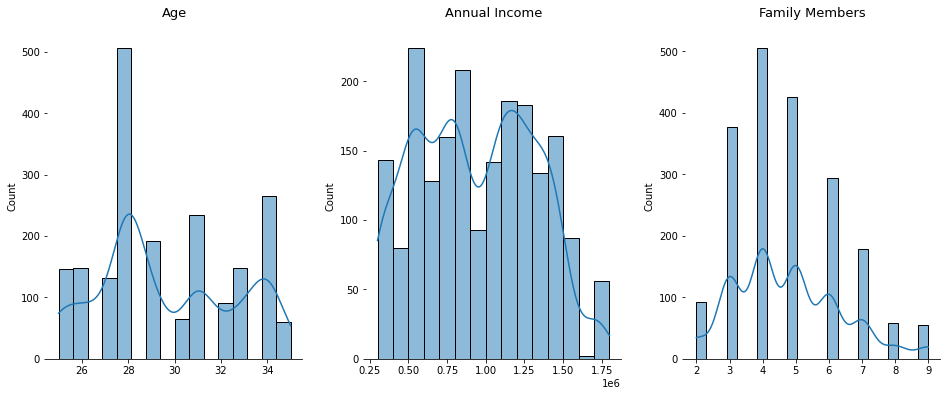

In [35]:
col_lst = ["Age", "Annual_Income", "Family_Members"]
create_histplot(data, col_lst)

In [36]:
data.describe()

,Age,Annual_Income,Family_Members,Chronic_Diseases,Travel_Insurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


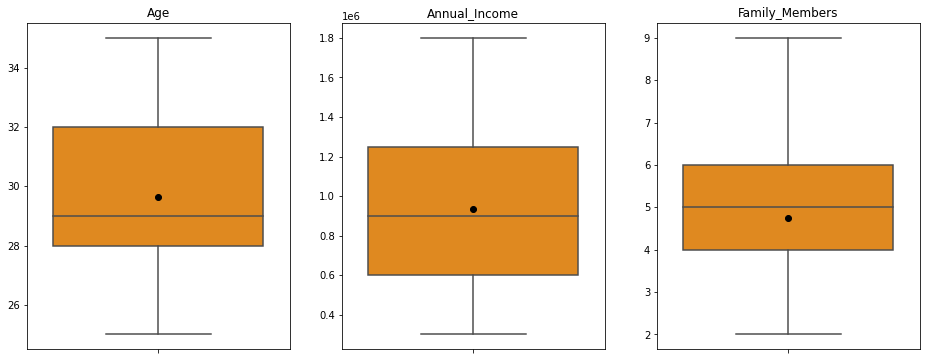

In [37]:
create_boxplot(data, col_lst)

Min age of customer is 25 and the oldest customer is 35. The distribution of age is trimodal, with one higher peak at the age 28. Annual income distribution is bimodal, with higher peak on 750000, the lowest annual incomce is 300000 and the highest: 1800000. The min number of family members is 2 and the highest number is 9. The most frequent number of family members is 4.

I will take a look if data distribution of these feature differs while taking into account if the customer bought an insurance or not.

In [38]:
data["Travel_Insurance"].value_counts()

0    1277
1     710
Name: Travel_Insurance, dtype: int64

In [39]:
replace_values = {1: "Yes", 0: "No"}

data = data.replace({"Travel_Insurance": replace_values})

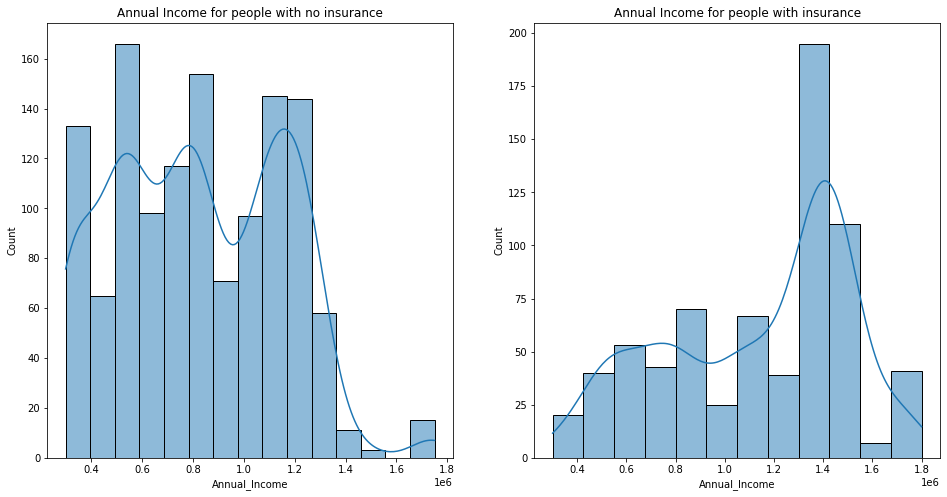

In [40]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(data[data["Travel_Insurance"] == "No"].Annual_Income, ax=ax[0], kde=True)
ax[0].set_title("Annual Income for people with no insurance")
sns.histplot(data[data["Travel_Insurance"] == "Yes"].Annual_Income, ax=ax[1], kde=True)
ax[1].set_title("Annual Income for people with insurance")
plt.show()

Observation: 

People with higher annual income tend to buy insurance more frequently.

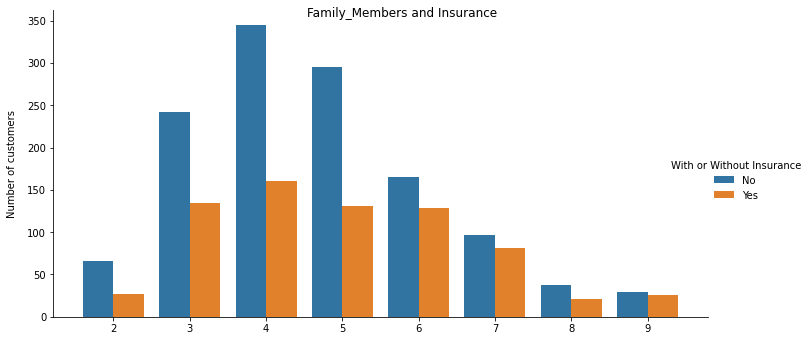

In [41]:
create_catplot(data, "Family_Members")

Observation:

People with higher number of family members are more likely to buy a travel insurance.

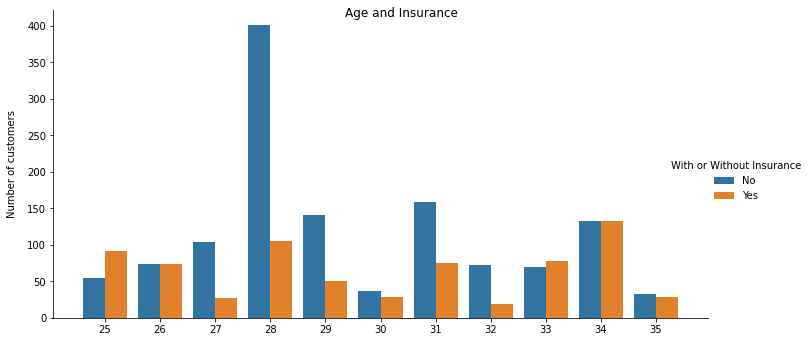

In [42]:
create_catplot(data, "Age")

Observation:

People aged 25-26 and more than 33 are more likely to buy a travel insurance. 
*Maybe younger people travel fot the first time and are more affraid of travelling. 

**Analysis of categorical features.**

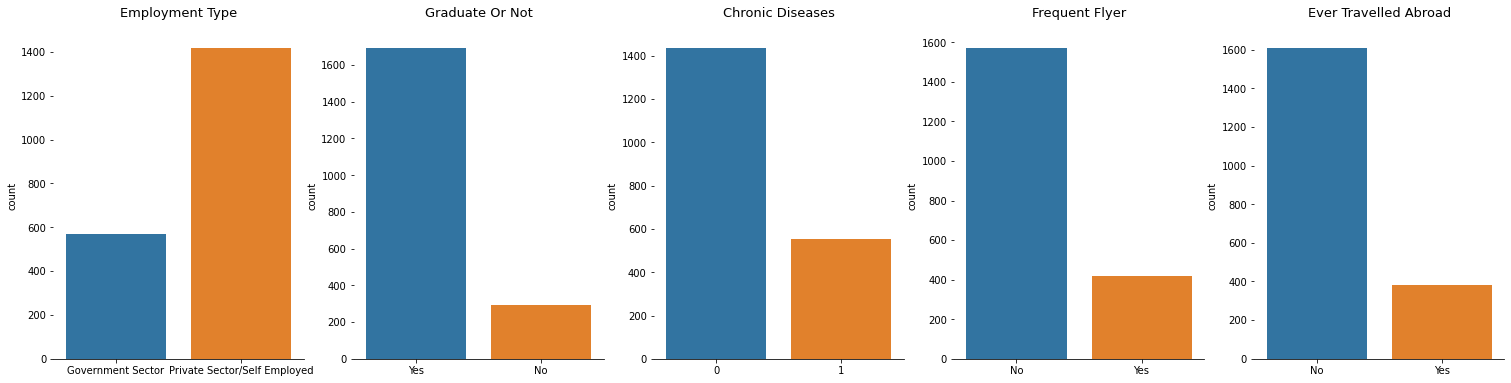

In [43]:
list_of_columns = [
    "Employment_Type",
    "Graduate_Or_Not",
    "Chronic_Diseases",
    "Frequent_Flyer",
    "Ever_Travelled_Abroad",
]
create_countplot(data, list_of_columns)

**Observations from that part:**

Categorical features includes information about Employment Type: Govemment Sector or Private Sector/Self Employed (with the majority of the latter). 

Majority of customers graduated. 

According to chronic diseases, also the majority of customers do not suffer from them. 

Majority of customers do not travel often and also they have never been abroad. 


Also important information from that part would be how many people of each category bought insurance or not.

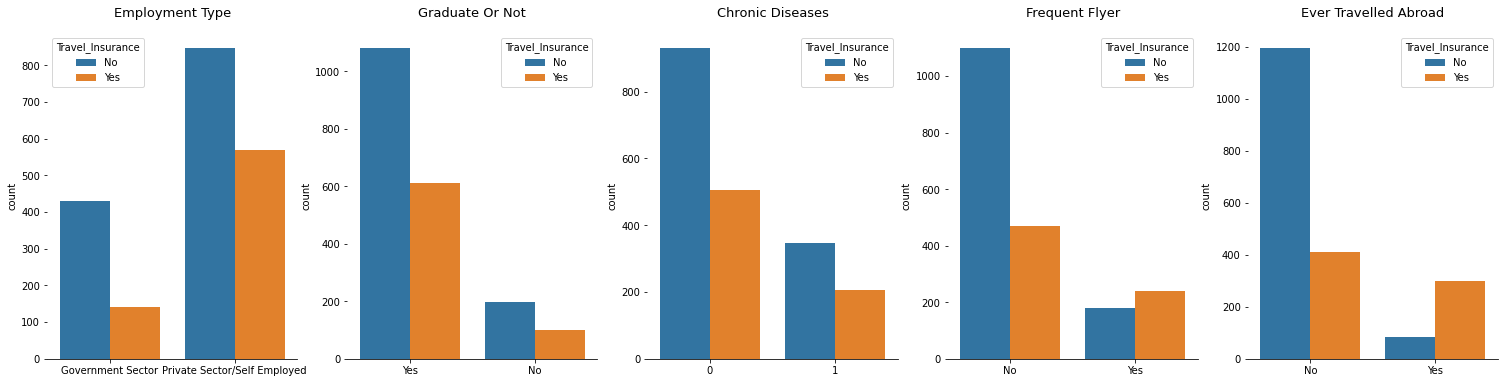

In [44]:
col_lst = [
    "Employment_Type",
    "Graduate_Or_Not",
    "Chronic_Diseases",
    "Frequent_Flyer",
    "Ever_Travelled_Abroad",
]

create_countplot_with_hue(data, col_lst)

Observation:

From all te categorical features, frequent flyers and people who have ever travelled abroad tend to buy travel insurance.


----

### **Statistical inference**

Some of the features from a dataset seems to be promising in case of buying insurance or not. I will check how the annual income, frequent fliers and travelling abroad is influencing buying an insurance with a certain amount of confidence.

In [45]:
bought_insurance = data[data["Travel_Insurance"] == "Yes"]
not_bought_insurance = data[data["Travel_Insurance"] == "No"]

In [46]:
replace_values_01 = {"Yes": 1, "No": 0}

bought_insurance = bought_insurance.replace(
    {"Frequent_Flyer": replace_values_01, "Ever_Travelled_Abroad": replace_values_01}
)

not_bought_insurance = not_bought_insurance.replace(
    {"Frequent_Flyer": replace_values_01, "Ever_Travelled_Abroad": replace_values_01}
)

In [47]:
bought_insurance[
    ["Annual_Income", "Chronic_Diseases", "Frequent_Flyer", "Ever_Travelled_Abroad"]
].describe()

,Annual_Income,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad
count,7.100000e+02,710.000000,710.000000,710.000000
mean,1.133239e+06,0.288732,0.336620,0.419718
std,3.748447e+05,0.453493,0.472887,0.493861
min,3.000000e+05,0.000000,0.000000,0.000000
25%,8.000000e+05,0.000000,0.000000,0.000000
50%,1.250000e+06,0.000000,0.000000,0.000000
75%,1.400000e+06,1.000000,1.000000,1.000000
max,1.800000e+06,1.000000,1.000000,1.000000


In [48]:
not_bought_insurance[
    ["Annual_Income", "Chronic_Diseases", "Frequent_Flyer", "Ever_Travelled_Abroad"]
].describe()

,Annual_Income,Chronic_Diseases,Frequent_Flyer,Ever_Travelled_Abroad
count,1.277000e+03,1277.000000,1277.000000,1277.000000
mean,8.212999e+05,0.271731,0.139389,0.064213
std,3.288989e+05,0.445026,0.346488,0.245228
min,3.000000e+05,0.000000,0.000000,0.000000
25%,5.500000e+05,0.000000,0.000000,0.000000
50%,8.000000e+05,0.000000,0.000000,0.000000
75%,1.100000e+06,1.000000,0.000000,0.000000
max,1.750000e+06,1.000000,1.000000,1.000000


**Test no.1:**

**Null W:** The average annual income for customers who bought insurance is the same as for people who didn't buy insurance.

**Alternative W:** The average annual income of customer who bought insurance isn't the same as for people who didn't buy insurance.

Significance level - 5%.


In [49]:
t_test, p_value, df = sm.stats.ttest_ind(
    bought_insurance["Annual_Income"],
    not_bought_insurance["Annual_Income"],
    usevar="pooled",
)

f"t_test: {t_test}, p_value: {p_value}, df: {df}"

't_test: 19.257785253687544, p_value: 6.63501776035329e-76, df: 1985.0'

Conclusion:

The p-value is close to 0 - I can reject the null hypothesis. The difference between average annual income of people who bought insurance or not is significant.

**Test no.2:**

**Null:** difference in population proportion between people who suffer from a chronic disease or not with buying/not buying insurance is equal to 0

**Alternative:** difference in population proportion is not equal to 0

Significance level - 5%

In [50]:
t_test, p_value, df = sm.stats.ttest_ind(
    bought_insurance["Chronic_Diseases"],
    not_bought_insurance["Chronic_Diseases"],
    usevar="pooled",
)
f"t_test: {t_test}, p_value: {p_value}, df: {df}"

't_test: 0.8105420115485089, p_value: 0.4177258933785051, df: 1985.0'

Conclusion:

The p-value is higher than 0.05 - I cannot reject the null hypothesis. The presence of chronic disease does not influence the decision about buying the insurance or not.

**Test no.3:**

**Null:** difference in population proportion between people who travelled abroad/frequently or not with buying/not buying insurance is equal to 0

**Alternative:** difference in population proportion is not equal to 0

Significance level - 5%

In [51]:
t_test, p_value, df = sm.stats.ttest_ind(
    bought_insurance["Frequent_Flyer"],
    not_bought_insurance["Frequent_Flyer"],
    usevar="pooled",
)
f"t_test: {t_test}, p_value: {p_value}, df: {df}"

't_test: 10.631295035893368, p_value: 1.0325506803560853e-25, df: 1985.0'

In [52]:
t_test, p_value, df = sm.stats.ttest_ind(
    bought_insurance["Ever_Travelled_Abroad"],
    not_bought_insurance["Ever_Travelled_Abroad"],
    usevar="pooled",
)
f"t_test: {t_test}, p_value: {p_value}, df: {df}"

't_test: 21.413067137383216, p_value: 1.088979005649178e-91, df: 1985.0'

Conclusion:

The p-value in both cases is close to 0 - I can reject the null hypothesis. The difference between proportion of people who fly frequently or travelled abroad and in the same time who bought insurance or not is significant.

----

### **CORRELATION BETWEEN FEATURES AND FEATURE ENGINEERING.**

To check correlation between all the features, first I need to convert object type variables into numeric one. Additionaly, some of the machine learning models require feature engineering to perform the algorithm. For example, logistic regression or SVM require all the features to be numerical. Decision Tree, as opposite example, does not need any feature encoding. However, as I will perform different algorithms, I do features encoding at this stage of my analysis.

**Categorical features - changing strings into numeric.**

In [53]:
replace_values_empl = {"Government Sector": 1, "Private Sector/Self Employed": 0}

# maybe for loop or function?
data = data.replace(
    {
        "Employment_Type": replace_values_empl,
        "Graduate_Or_Not": replace_values_01,
        "Frequent_Flyer": replace_values_01,
        "Ever_Travelled_Abroad": replace_values_01,
        "Travel_Insurance": replace_values_01,
    }
)

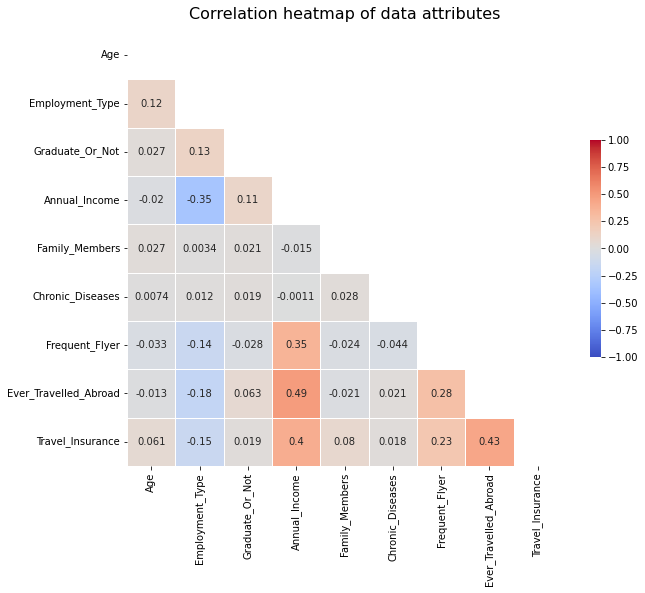

In [54]:
create_heatmap(data, (10, 8))

Observation:

Any pair of features represents high correlation (either poitive or negative).

Changing numerical continuous features into categorical ones.

**Annual_Income**

In [55]:
data["Annual_Income_Range"] = pd.qcut(data["Annual_Income"], 6)
data.groupby(["Annual_Income_Range"])[
    "Travel_Insurance"
].value_counts().to_frame().style.background_gradient(cmap="summer_r")

In [56]:
data["Annual_Income_Cat"] = 0
data.loc[data["Annual_Income"] <= 500000.0, "Annual_Income_Cat"] = 0
data.loc[
    (data["Annual_Income"] > 500000.0) & (data["Annual_Income"] <= 700000.0),
    "Annual_Income_Cat",
] = 1
data.loc[
    (data["Annual_Income"] > 700000.0) & (data["Annual_Income"] <= 900000.0),
    "Annual_Income_Cat",
] = 2
data.loc[
    (data["Annual_Income"] > 900000.0) & (data["Annual_Income"] <= 1150000.0),
    "Annual_Income_Cat",
] = 3
data.loc[
    (data["Annual_Income"] > 1150000.0) & (data["Annual_Income"] <= 1350000.0),
    "Annual_Income_Cat",
] = 4
data.loc[
    (data["Annual_Income"] > 1350000.0) & (data["Annual_Income"] <= 1800000.0),
    "Annual_Income_Cat",
] = 5

Dropping unnecessary features.

In [57]:
data.drop(["Annual_Income_Range"], axis=1, inplace=True)

In [58]:
data.columns

Index(['Age', 'Employment_Type', 'Graduate_Or_Not', 'Annual_Income',
       'Family_Members', 'Chronic_Diseases', 'Frequent_Flyer',
       'Ever_Travelled_Abroad', 'Travel_Insurance', 'Annual_Income_Cat'],
      dtype='object')

In [59]:
data_cont = data[
    [
        "Age",
        "Employment_Type",
        "Graduate_Or_Not",
        "Family_Members",
        "Chronic_Diseases",
        "Frequent_Flyer",
        "Ever_Travelled_Abroad",
        "Annual_Income",
        "Travel_Insurance",
    ]
]

data_disc = data[
    [
        "Age",
        "Employment_Type",
        "Graduate_Or_Not",
        "Family_Members",
        "Chronic_Diseases",
        "Frequent_Flyer",
        "Ever_Travelled_Abroad",
        "Annual_Income_Cat",
        "Travel_Insurance",
    ]
]

----

In [60]:
data_cont = data_cont.drop_duplicates()

In [61]:
data_cont['Travel_Insurance'].value_counts()

0    766
1    483
Name: Travel_Insurance, dtype: int64

### PREDICTIVE MODELING

Splitting dataset into train and test sets.

In [62]:
X = data_cont.iloc[:, 0:-1]
y = data_cont.iloc[:, -1]

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

First round of modeling I am going to perform without any cross-validation. At this stage I just want to have the general idea of the outcome of the models (so i use only accuracy score as the metric).

**LOGISTIC REGRESSION.**

In [63]:
ml_model(LogisticRegression(class_weight='balanced'), X_train, X_test, y_train, y_test)

"The accuracy of the LogisticRegression(class_weight='balanced') is 0.632"

**SUPPORT VECTOR MACHINE.**

In [64]:
ml_model(SVC(kernel="linear", class_weight='balanced'), X_train, X_test, y_train, y_test)

"The accuracy of the SVC(class_weight='balanced', kernel='linear') is 0.6746666666666666"

In [65]:
ml_model(SVC(kernel="rbf", gamma=0.1, class_weight='balanced'), X_train, X_test, y_train, y_test)

"The accuracy of the SVC(class_weight='balanced', gamma=0.1) is 0.7173333333333334"

**K-NN.**

In [66]:
ml_model(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

'The accuracy of the KNeighborsClassifier() is 0.672'

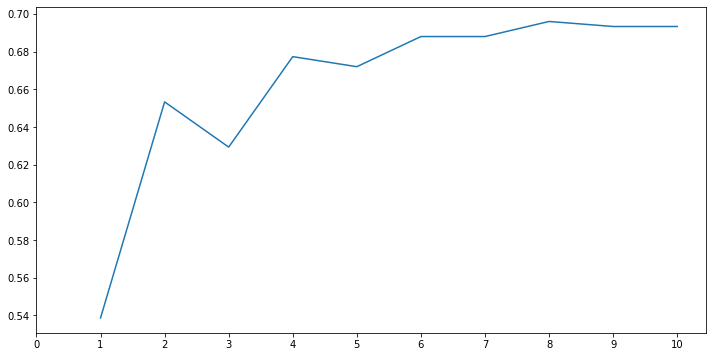

Accuracies for different values of n are: [0.53866667 0.65333333 0.62933333 0.67733333 0.672      0.688
 0.688      0.696      0.69333333 0.69333333] with the max value as  0.696


In [67]:
a_index = list(range(1, 11))
a = pd.Series(dtype=float64)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a = pd.concat([a, pd.Series(accuracy_score(prediction, y_test))])
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print(
    "Accuracies for different values of n are:",
    a.values,
    "with the max value as ",
    a.values.max(),
)

In [68]:
ml_model(KNeighborsClassifier(n_neighbors=8), X_train, X_test, y_train, y_test)

'The accuracy of the KNeighborsClassifier(n_neighbors=8) is 0.696'

**DECISION TREE.**

In [69]:
ml_model(DecisionTreeClassifier(class_weight='balanced'), X_train, X_test, y_train, y_test)

"The accuracy of the DecisionTreeClassifier(class_weight='balanced') is 0.6053333333333333"

**RANDOM FOREST.**

In [70]:
ml_model(RandomForestClassifier(n_estimators=100, class_weight='balanced'), X_train, X_test, y_train, y_test)

"The accuracy of the RandomForestClassifier(class_weight='balanced') is 0.6506666666666666"

**NAIVE BAYES.**

In [71]:
X_disc = data_disc.iloc[:, 0:-1]
y_disc = data_disc.iloc[:, -1]

X_disc = X_disc.to_numpy()
y_disc = y_disc.to_numpy()

X_train_disc, X_test_disc, y_train_disc, _disc = train_test_split(
    X_disc, y_disc, test_size=0.3, random_state=0, stratify=y_disc
)

scaler = StandardScaler()
X_train_disc = scaler.fit_transform(X_train_disc)
X_test_disc = scaler.transform(X_test_disc)

model = GaussianNB()
model.fit(X_train_disc, y_train_disc)
prediction = model.predict(X_test_disc)
f"The accuracy of the {model} is {accuracy_score(prediction, _disc)}"

'The accuracy of the GaussianNB() is 0.7705192629815746'

From all the models above, without tuning hyperparameters and adjusting models in any way, I can see that all models perform similarily. Gausian Naive Bayes is more successful, however, in the course of this project, I will not use it for my analysis.

To obtain more generalized information about models' performence, I am going to perform cross-validation.

In [72]:
kfold = KFold(n_splits=6)
xyz = []
accuracy = []
std = []
classifiers = [
    "Linear SVM",
    "Radial SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "KNN",
]
models = [
    SVC(kernel="linear", class_weight='balanced'),
    SVC(kernel="rbf", class_weight='balanced'),
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    KNeighborsClassifier(n_neighbors=8),
]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models = pd.DataFrame({"CV Mean": xyz, "Std": std}, index=classifiers)
new_models

,CV Mean,Std
Linear SVM,0.554794,0.043675
Radial SVM,0.675703,0.043039
Logistic Regression,0.386736,0.036939
Decision Tree,0.562876,0.038141
Random Forest,0.632522,0.020598
KNN,0.730949,0.044933


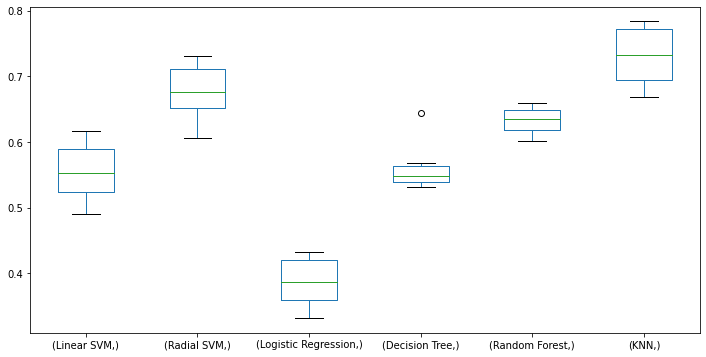

In [73]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot(grid=False);

In [74]:
from sklearn.metrics import roc_auc_score


kfold = KFold(n_splits=6)
xyz = []
roc_score = []
std = []
classifiers = [
    "Linear SVM",
    "Radial SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "KNN",
]
models = [
    SVC(kernel="linear", class_weight='balanced'),
    SVC(kernel="rbf", class_weight='balanced'),
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    KNeighborsClassifier(n_neighbors=8),
]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    roc_score.append(cv_result)
new_models = pd.DataFrame({"CV Mean": xyz, "Std": std}, index=classifiers)
new_models

,CV Mean,Std
Linear SVM,0.674842,0.057873
Radial SVM,0.671946,0.060840
Logistic Regression,0.672237,0.056458
Decision Tree,0.579027,0.027105
Random Forest,0.617673,0.049584
KNN,0.700193,0.048152


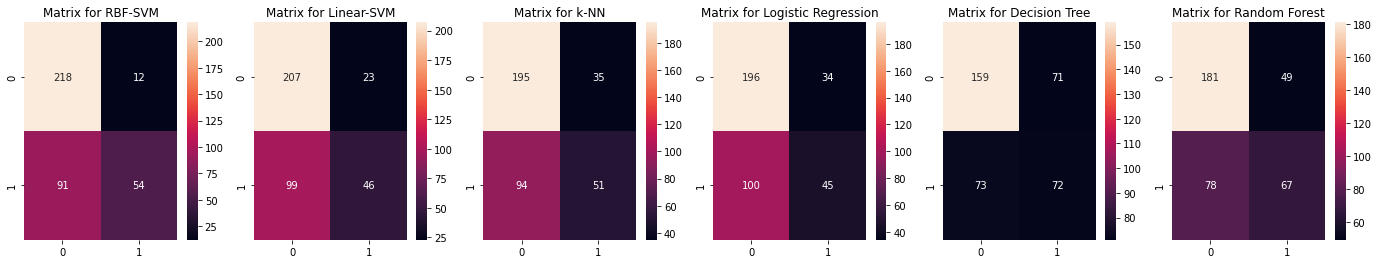

In [75]:
dict_of_models = {
    "RBF-SVM": SVC(kernel="rbf", gamma=0.1),
    "Linear-SVM": SVC(kernel="linear"),
    "k-NN": KNeighborsClassifier(n_neighbors=6),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

create_confusion_matrix(dict_of_models, X_train, X_test, y_train, y_test)

Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. 

Lets consider the first plot for rbf-SVM:

1) The no. of correct predictions is 218 (people who did not buy insurance) + 54 (for people who bought insurance) with the mean CV accuracy being 272/375 = 72,53% which corresponds with previous results.

2) Errors--> Wrongly Classified 91 people who buy insurance as people who did not, and 12 people were classified as people who did no buy insurance, but in fact they did.


All clasifiers make similar mistakes exept Decision Tree, where errors are more balanced.


----

### **HYPERPARAMETER TUNING.**

I am going to try hyperparametr tuning for rbf-SVM, k-NN, Decision Tree, Random Forest and Logistic Regression.

SVM

In [76]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ["rbf"]
hyper = {"kernel": kernel, "C": C, "gamma": gamma}
gd = GridSearchCV(estimator=SVC(), param_grid=hyper, verbose=True)
gd.fit(X, y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'kernel': ['rbf']},
             verbose=True)

In [77]:
print(gd.best_score_)
print(gd.best_estimator_)

0.747768674698795
SVC(C=0.6, gamma=0.1)


K-NN

In [78]:
leaf_size = list(range(1, 30))
n_neighbors = list(range(1, 15))
p = [1, 2]

hyperparameters = {"leaf_size": leaf_size, "n_neighbors": n_neighbors, "p": p}

gd = GridSearchCV(
    estimator=KNeighborsClassifier(), param_grid=hyperparameters, verbose=True
)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 812 candidates, totalling 4060 fits
0.7405590361445782
KNeighborsClassifier(leaf_size=1, n_neighbors=10)


Decision Tree

In [79]:
scores_test = []
scores_train = []

for max_d in range(1, 8):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train, y_train)
    scores_train.append([max_d, round(model.score(X_train, y_train), 4)])
    scores_test.append([max_d, round(model.score(X_test, y_test), 4)])

print(scores_train)
print(scores_test)

[[1, 0.7288], [2, 0.73], [3, 0.7849], [4, 0.786], [5, 0.7941], [6, 0.7975], [7, 0.8066]]
[[1, 0.7067], [2, 0.712], [3, 0.7573], [4, 0.752], [5, 0.752], [6, 0.7547], [7, 0.744]]


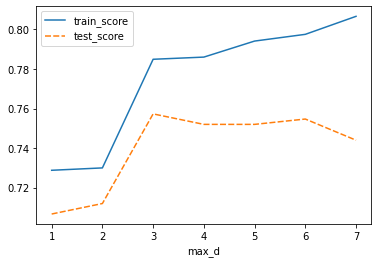

In [80]:
scores_train = pd.DataFrame(scores_train, columns=["max_d", "train_score"])
scores_test = pd.DataFrame(scores_test, columns=["max_d", "test_score"])
all_results = scores_train.merge(scores_test, on="max_d")
all_results["max_d"] = all_results["max_d"].astype(str)
all_results = all_results.set_index("max_d")


sns.lineplot(data=all_results)
plt.tick_params(axis="x")
plt.show()

Random Forest

In [81]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=500, num=10)]
max_depth = [int(x) for x in np.linspace(2, 50, num=5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [82]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 14, 26, 38, 50, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, verbose=2)

In [83]:
rf_random.best_params_

{'n_estimators': 445,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': None,
 'bootstrap': True}

In [100]:
rf_random.best_score_

0.7757575044328328

Logistic Regression

In [85]:
param_grid = [
    {
        "C": np.linspace(start=1, stop=10, num=10),
        "solver": ["lbfgs", "newton-cg", "sag", "saga"],
        "max_iter": [1000, 2500, 5000],
    }
]

In [ ]:
model_lr = GridSearchCV(
    LogisticRegression(), param_grid=param_grid, cv=3, verbose=True, n_jobs=-1
)
best_clf = model_lr.fit(X, y)

In [87]:
best_clf.best_estimator_

LogisticRegression(max_iter=1000, solver='newton-cg')

In [101]:
best_clf.best_score_

0.6981357221914776

**Observation:**

The best score for SVM-RBF is 74,78% for C=0.6 and gamma=0.1.

For k_NN the best score is 74,06% for leaf_size=1 and n=10.

DT performs best with max_depth=3 - 78,48%.

RF has highest score of 77,57%.

Linear Regression did not improved perfomance significantly even after parameter tuning, the score is 69,81%.

----

## Ensembling

I am going to check if performing ensembled models increase the accuracy of my predictions.

### Voting classifier

In [102]:
ensemble_lin_rbf = VotingClassifier(
    estimators=[
        ("KNN", KNeighborsClassifier(leaf_size=1, n_neighbors=10)),
        ("RBF", SVC(probability=True, kernel="rbf", C=0.6, gamma=0.1)),
        ("DT", DecisionTreeClassifier(max_depth=3)),
        ("RF",
            RandomForestClassifier(
                n_estimators=445, min_samples_split=5, min_samples_leaf=4
            ),
        ),
    ],
    voting="soft",
).fit(X_train, y_train)
print("The accuracy for ensembled model is:", ensemble_lin_rbf.score(X_test, y_test))
cross = cross_val_score(ensemble_lin_rbf, X, y, cv=6, scoring="accuracy")
print("The cross validated score is", cross.mean())

The accuracy for ensembled model is: 0.752
The cross validated score is 0.7685751748251749


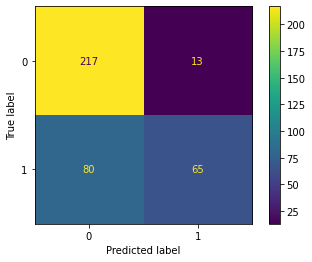

In [103]:
y_pred = ensemble_lin_rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=ensemble_lin_rbf.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=ensemble_lin_rbf.classes_
)
disp.plot();

### Bagging

In [91]:
model = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=10),
    random_state=0,
    n_estimators=700,
)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print("The accuracy for bagged KNN is:", accuracy_score(prediction, y_test))
result = cross_val_score(model, X, y, cv=10, scoring="accuracy")
print("The cross validated score for bagged KNN is:", result.mean())

The accuracy for bagged KNN is: 0.6933333333333334
The cross validated score for bagged KNN is: 0.7309483870967741


### XGBoost

In [92]:
xgboost = xg.XGBClassifier(n_estimators=30, learning_rate=0.1)
result = cross_val_score(xgboost, X, y, cv=10, scoring="accuracy")
print("The cross validated score for XGBoost is:", result.mean())

The cross validated score for XGBoost is: 0.7637870967741935


**Conclusion:**

Ensambled model with voting classifiers, consisted of best performed model had similar accuracy of 76,86%/76,38% as the best individual estimator. 
Lack of significant increment in the accuracy score might come from the fact that one of the models can mislead the other.

----

## FEATURE IMPORTANCE

I am going to check which features have the highest importance for SVM, Linear Regression and Decision Tree.

SVM

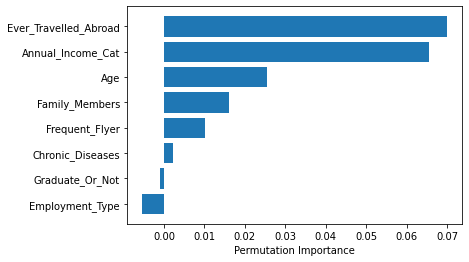

In [122]:
model = SVC(kernel="rbf", C=0.6, gamma=0.1)
model.fit(X_train, y_train)
perm_importance = permutation_importance(model, X_test, y_test)
feature_names = [
    "Age",
    "Employment_Type",
    "Graduate_Or_Not",
    "Family_Members",
    "Chronic_Diseases",
    "Frequent_Flyer",
    "Ever_Travelled_Abroad",
    "Annual_Income_Cat",
]
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

Exact explainer: 376it [08:44,  1.42s/it]                         


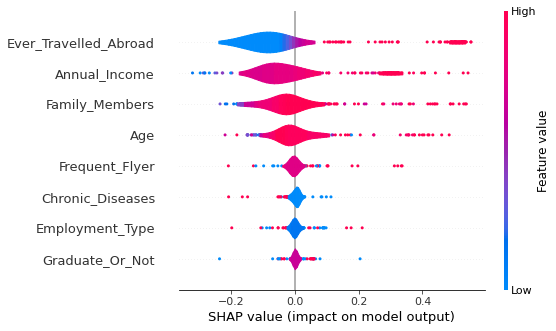

In [139]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
feature_names = data_cont.iloc[:,0:-1].columns
shap.summary_plot(shap_values, plot_type='violin', feature_names=feature_names)

Logistic Regression

In [94]:
data_cont.columns

Index(['Age', 'Employment_Type', 'Graduate_Or_Not', 'Family_Members',
       'Chronic_Diseases', 'Frequent_Flyer', 'Ever_Travelled_Abroad',
       'Annual_Income', 'Travel_Insurance'],
      dtype='object')

In [119]:
model = LogisticRegression(C=2.0, max_iter=1000)
model.fit(X_train, y_train)
model.coef_

array([[ 0.15637294, -0.036528  ,  0.03426647,  0.25082667, -0.01422788,
         0.17013103,  0.45132325,  0.43631278]])

In [120]:
model.intercept_

array([-0.50987261])

Exact explainer: 376it [08:48,  1.43s/it]                         


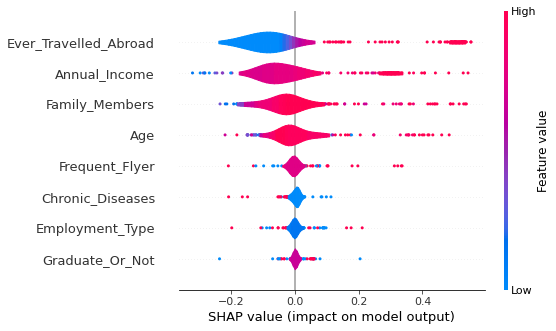

In [138]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
feature_names = data_cont.iloc[:,0:-1].columns
shap.summary_plot(shap_values, plot_type='violin', feature_names=feature_names)

Decision Tree

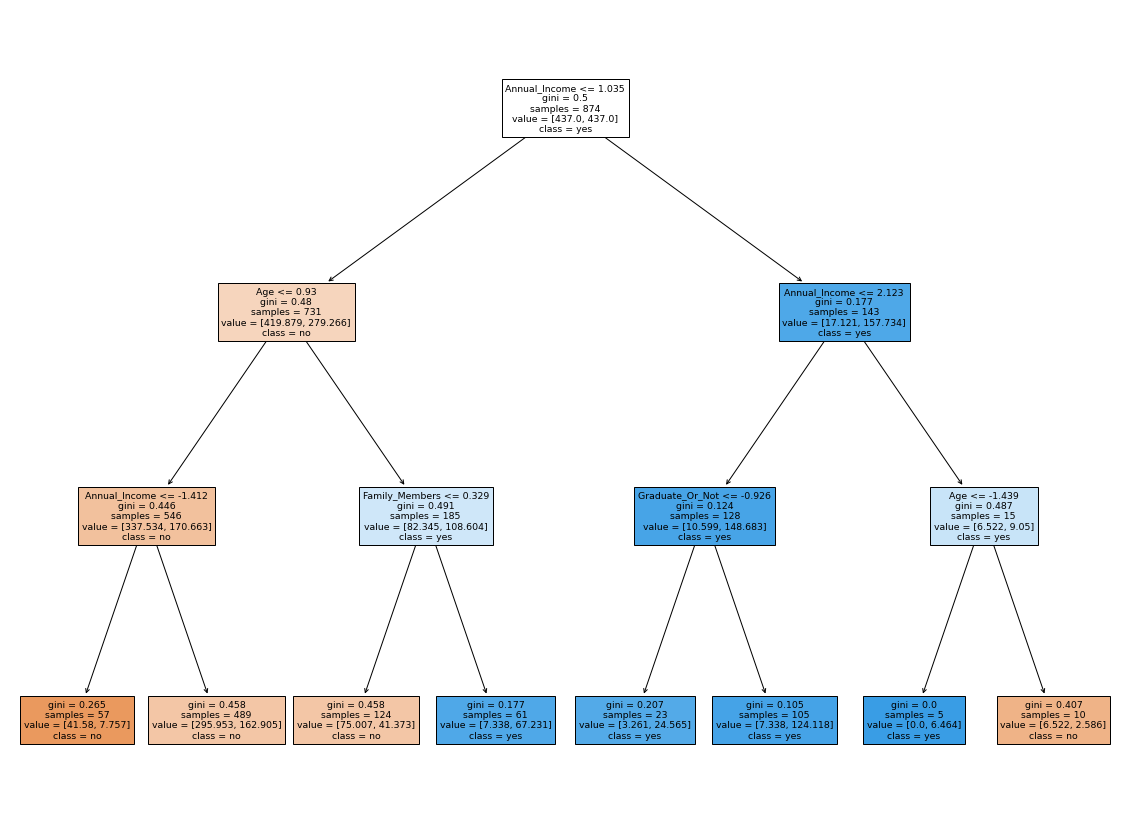

In [111]:
model_to_visualize = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
model_to_visualize.fit(X_train, y_train)

fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(
    model_to_visualize,
    feature_names=data_cont.iloc[:, 0:-1].columns,
    class_names=["no", "yes"],
    filled=True,
)

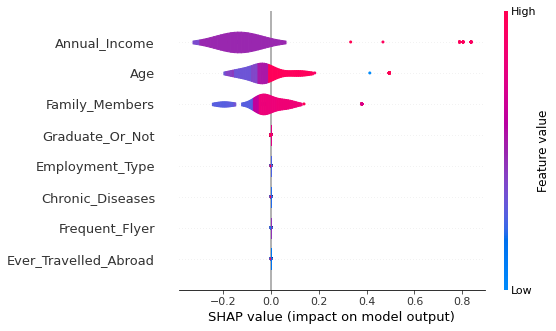

In [137]:
explainer = shap.Explainer(model_to_visualize.predict, X_test)
shap_values = explainer(X_test)
feature_names = data_cont.iloc[:,0:-1].columns
shap.summary_plot(shap_values, plot_type='violin', feature_names=feature_names)

**Conclusion:** 

The most important features for rbf-SVM were Ever_Travelled_Abroad and Annual_Income. The same features were the most important (have the highest coefficients) for Linear Regression. In case of Decision tree the most important features were Annual_Income, Age, Family_Members.

----

### **BUSINESS CONSIDERATIONS.**

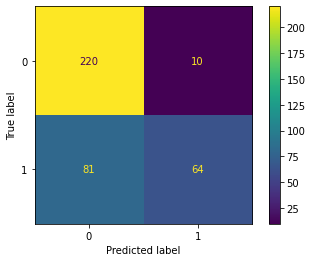

In [130]:
y_pred = (model_to_visualize.predict_proba(X_test)[:,1] >= 0.8)
cm = confusion_matrix(y_test, y_pred, labels=model_to_visualize.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=model_to_visualize.classes_
)
disp.plot();

In [131]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.730897,0.956522,0.828625,230.000000
1,0.864865,0.441379,0.584475,145.000000
accuracy,0.757333,0.757333,0.757333,0.757333
macro avg,0.797881,0.698951,0.706550,375.000000
weighted avg,0.782698,0.757333,0.734220,375.000000


Only by looking at the number of people who bought and did not buy the insurance, we would say that the effectiveness of our sales is equal to: 35,73%.
It means that if new 1000 customers arrives to our travel agency, 358 people would buy the insurance from us.

If we want to increase our sales by 10% - from 35,73 to 45,73%, so want that another 100 out of 1000 people would buy the package, we have to make some effort and prepare marketing campaign.

Best performing model had the accuracy score of  78,48% - Decision Tree. From confusion matrix I can see, that model makes more mistakes predicting that someone does not buy an insurance, while in fact, the purchase took place. This mistake is less harm for our business because if we did not expected success, we did not make this kind of assumption in our forecasting. Model does not make too many mistakes by predicting that people bought an insurance while it did not happened. 

So we want to be more effective in terms of adjusting our offer to incoming customers.

Taking a look at what features were important in the decision tree, higher annual income indicates that customer more likely buy an insurance.

2 ways to deal with this:
- target campaigns to more luxury travel offers so more people travelling at the high cost would be exposed to the agency offer
- make a special discount for people who buy low-fee trips, to make an insurance affordable for them.

Age was important feature too, but the range of age of customers was only 25-35. These people have similar activites and are on more or less the same life stage, so it would be hard to consider special offers for people based solely on age.

Family Members is another important factor. People who have bigger families more likely buy the package. Strategies:
- more offers for family holidays
- special offer for people who do not have a big family.



----

### **GENERAL CONCLUSIONS**

I performed analysis of Travel Insurance Dataset.

My goal was to predict what kind of person is most likely to buy a travel insurance package based on 8 features, described above.

To achieved this goal, I built several machine learning models, including Logistic Regression, Support Vector Machines, Decision Tree, Random Forest, k-NN and Naive Bayes.
During course of my action (after hyperparameter tuning and checking ensembled models), I chose RBF-SVM and Decision Tree as most promising models for prediction.

I achieved: 74,78% of accuracy for rbf-SVM with C=0.6 and gamma=0.1 and 78,48% of accuracy for Decision Tree with max_depth=3.

Based on that models I could also make conclusions what features have the highest impact if the customer buy the insurance or not, which is:
- annual income
- number of family members
- fact if person travelled abroad or not.

Knowing that I can suggest specific strategies to target people who might be interesed in buying insurence, my ideas are desribed above.

----
----